In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
pd.set_option('display.expand_frame_repr', False)

# Visualisation
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (25, 8)
plt.rcParams['figure.titlesize'] = 30
plt.rcParams['font.size'] = 20
import seaborn as sns
%matplotlib inline 
# Machine Learning


<h1 align='center'> Prédiction de la consommation d'énergie d'appareils électro-ménager </h1>

<h3 align='center'> A partir de Données experimentales de consommation d'énergie d'appareils électro-ménagers dans un batiment de faible consommation en Belgique.</h3>


<br>
<br>

In [3]:
df= pd.read_csv('./data/KAG_energydata_complete.csv')
df_all=pd.read_csv('./data/KAG_energydata_complete.csv')
df.head()


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


<h2>Contenu</h2>
<p>Les données de température et d'humidité sont des moyennes faites toutes les 10 minutes a partir des données récoltées avec Zigbee. Les données météorologiques proviennent de la station de l'aéroport de Chievres proche au batiment.<p> 
<ul>
    <li><strong>date:</strong> Périodes de 10 minutes sur 4 mois et demi</li>
    <li><strong>Appliances:</strong> Energie utilisée(Wh)</li>
    <li><strong>lights:</strong> Energie utilisée pour le luminaire(Wh)</li>
    <li><strong>T1:</strong> Température de l'espace cuisine(Celsius)</li>
    <li><strong>RH_1:</strong> Humidité de l'espace cuisine(%) </li>
    <li><strong>T2:</strong> Température de l'espace salon(Celsius) </li>
    <li><strong>RH_2:</strong> Humidité de l'espace salon(%) </li>
    <li><strong>T3:</strong> Température de l'espace buanderie(Celsius) </li>
    <li><strong>RH_3:</strong> Humidité de l'espace buanderie(%) </li>
    <li><strong>T4:</strong> Température de l'espace bureau(Celsius) </li>
    <li><strong>RH_4:</strong> Humidité de l'espace bureau(%) </li>
    <li><strong>T5:</strong> Température de l'espace salle de bain(Celsius) </li>
    <li><strong>RH_5:</strong> Humidité de l'espace salle de bain(%) </li>
    <li><strong>T6:</strong> Température extérieure au batiment face Nord (Celsius) </li>
    <li><strong>RH_6:</strong> Humidité extérieure au batiment face Nord(%) </li>
    <li><strong>T7:</strong> Température de l'espace salle de repassage(Celsius) </li>
    <li><strong>RH_7:</strong> Humidité de l'espace salle de repassage(%) </li>
    <li><strong>T8:</strong> Température de l'espace chambre enfant(Celsius) </li>
    <li><strong>RH_8:</strong> Humidité de l'espace chambre enfant(%) </li>
    <li><strong>T9:</strong> Température de l'espace chambre parents(Celsius) </li>
    <li><strong>RH_9:</strong> Humidité de l'espace chambre parents(%) </li>
    <li><strong>T_out:</strong> Température extérieure(Celsius) </li>
    <li><strong>Press_mm_hg:</strong> Pression(Torr ou mmHg)</li>
    <li><strong>RH_out:</strong> Humidité extérieure(%)</li>
    <li><strong>Windspeed:</strong> Vitesse du vent(m/s)</li>
    <li><strong>Visibility:</strong> Visibilité(km)</li>
    <li><strong>Tdewpoint:</strong> Point de rosée(Â°C)</li>
    <li><strong>rv1, rv2:</strong> Variables aléatoires</li>
</ul>

<p>L'unite de mesure de la pression du jeu de données ne fait pas partie du Systeme international d'unités, dans lequel c'est le pascal. Une unité de pression atmosphérique normale = 760 mmHg. 1 atm=101 325Pa.</p>

## Compréhension générale du jeu de donnée

In [4]:
print(df.dtypes)

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object


Les données sont des variables quantitatives continues

In [5]:
# Transtypage de la date
df.date = df.date.astype('datetime64[ns]')
print("Date début:",df.date.min(),"\nDate fin:", df.date.max())
df.set_index('date', inplace=True)

Date début: 2016-01-11 17:00:00 
Date fin: 2016-05-27 18:00:00


Les données ont été récoltées sur une période qui s'étend du 11 janvier au 27 mai en 2016.

In [6]:
# Suppression des variables aléatoires
df.drop('rv1',axis=1,inplace=True)
df.drop('rv2',axis=1,inplace=True)

## Statistiques

In [7]:
print( 'shape:',df.shape)
df.describe()

shape: (19735, 26)


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000


1) On remarque que pour la variable Appliances, la valeur maximale est tres éloignée des autres. Cela pourrait etre une erreur de saisie.<br>
2) Les températures et taux d'humidité semblent se ressembler dans toutes les pieces de la maison.<br>
3) La consommation des luminaires est la plupart du temps égale a 0.

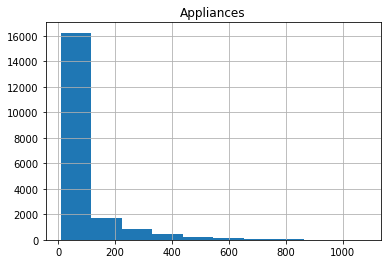

In [8]:
df.hist('Appliances')
plt.savefig('Appliances_hist.png')
plt.show()

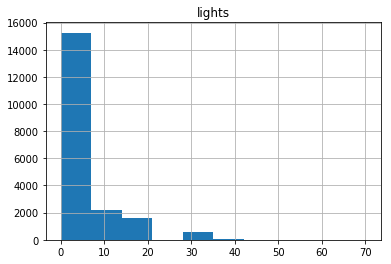

In [9]:
df.hist('lights')
plt.savefig('lights_hist.png')
plt.show()

Modification du dataframe

In [10]:
## Regroupement des pieces intérieures pour plus de lisibilité des données
# Copie du df
df_simple = df.copy()

#Fonction pour recuperer les colonnes correspondantes aux pieces de la maison
def get_inside(den):
    areas = []
    for x in range(1,10):
        if x !=6:
            z = str(x)
            areas.append(den+z)
    return(areas)

# Creation des moyennes de toutes les pieces
temp = df[get_inside('T')].mean(axis=1)
rh = df[get_inside('RH_')].mean(axis=1)

#Suppression des colonnes dont on a fait la moyenne
for c in get_inside('T'):
    df_simple.drop(c, axis=1, inplace=True)
for c in get_inside('RH_'):
    df_simple.drop(c,axis=1,inplace=True)

# Ajout de la moyenne
df_simple['T_avg_in']=temp
df_simple['RH_avg_in']=rh

In [11]:
df_simple.describe()

,Appliances,lights,T6,RH_6,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,T_avg_in,RH_avg_in
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,7.910939,54.609083,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,20.815611,41.221952
std,102.524891,7.935988,6.090347,31.149806,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,1.812567,3.977196
min,10.000000,0.000000,-6.065000,1.000000,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,16.012708,30.842798
25%,50.000000,0.000000,3.626667,30.025000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,19.663000,38.354583
50%,60.000000,0.000000,7.300000,55.290000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,20.597500,40.572708
75%,100.000000,0.000000,11.256000,83.226667,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,21.764375,44.162176
max,1080.000000,70.000000,28.290000,99.900000,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,26.061940,53.947153


Normalisation des donnees

In [12]:
# Normalisation des données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df_simple)

df_simple_scaled = df_simple.copy()
df_simple_scaled.iloc[:,:] = scaled

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## Corrélation des données

In [13]:
df_simple_scaled.corr()

,Appliances,lights,T6,RH_6,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,T_avg_in,RH_avg_in
Appliances,1.000000,0.197278,0.117638,-0.083178,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,0.054740,-0.020075
lights,0.197278,1.000000,-0.079029,0.153756,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,-0.079426,0.095659
T6,0.117638,-0.079029,1.000000,-0.672137,0.974787,-0.141643,-0.569119,0.169185,-0.081313,0.764242,0.708575,0.136622
RH_6,-0.083178,0.153756,-0.672137,1.000000,-0.641572,-0.065814,0.718587,0.098317,0.108705,-0.260417,-0.727213,0.450460
T_out,0.099155,-0.074424,0.974787,-0.641572,1.000000,-0.143249,-0.574197,0.192936,-0.077367,0.790661,0.721075,0.179625
Press_mm_hg,-0.034885,-0.010576,-0.141643,-0.065814,-0.143249,1.000000,-0.092017,-0.235032,0.040315,-0.244098,-0.153418,-0.265121
RH_out,-0.152282,0.068543,-0.569119,0.718587,-0.574197,-0.092017,1.000000,-0.176458,0.083125,0.036506,-0.387922,0.431970
Windspeed,0.087122,0.060281,0.169185,0.098317,0.192936,-0.235032,-0.176458,1.000000,-0.007516,0.125972,-0.141601,0.224227
Visibility,0.000230,0.020038,-0.081313,0.108705,-0.077367,0.040315,0.083125,-0.007516,1.000000,-0.042190,-0.097171,0.002617
Tdewpoint,0.015353,-0.036322,0.764242,-0.260417,0.790661,-0.244098,0.036506,0.125972,-0.042190,1.000000,0.590321,0.548511


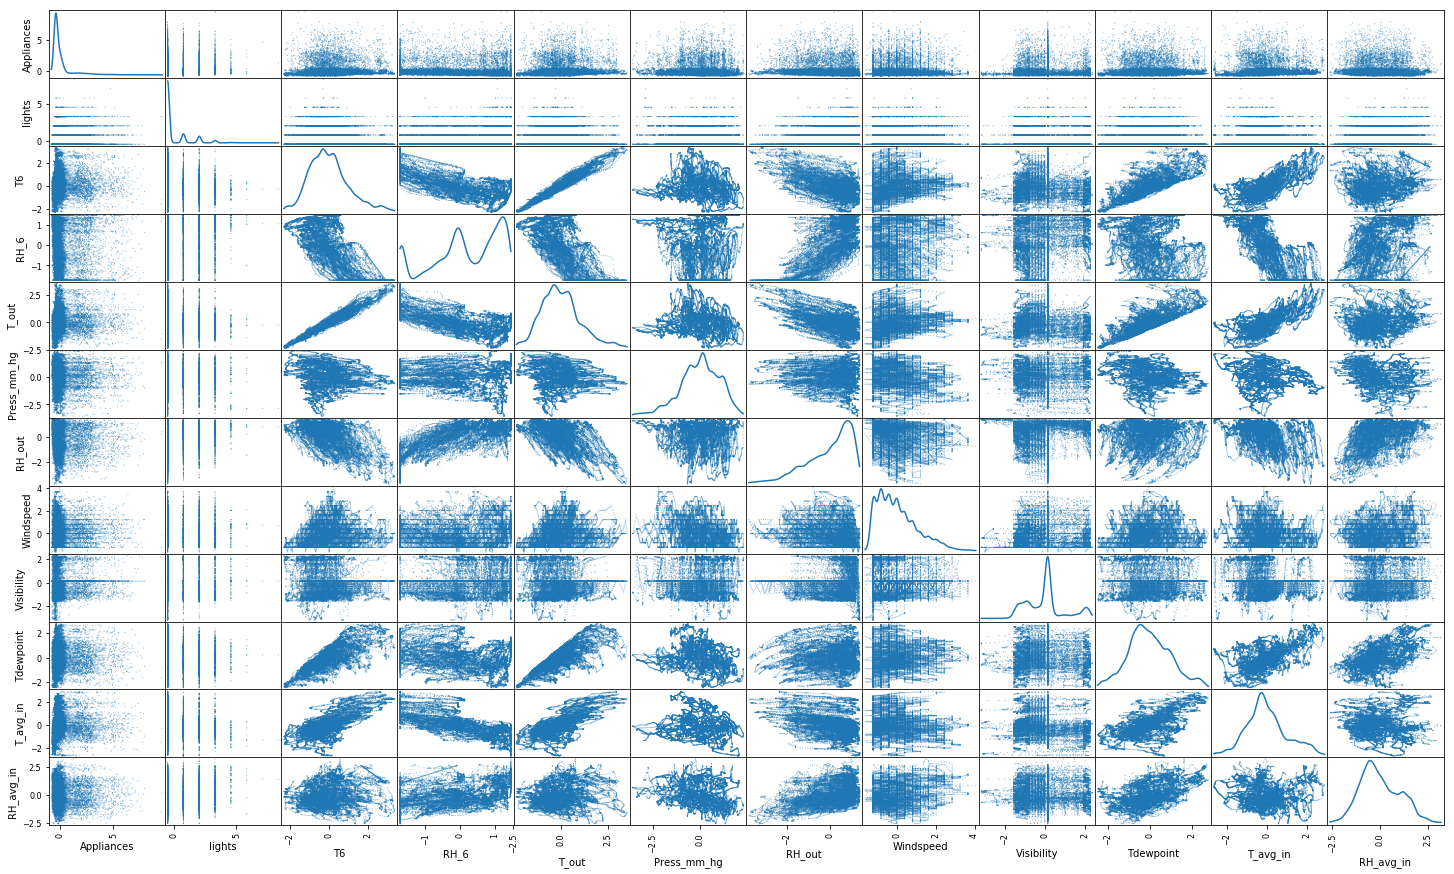

In [14]:
from seaborn import pairplot
pd.plotting.scatter_matrix(df_simple_scaled,figsize=(25,15),s=5, diagonal='kde')
plt.show()

## Evolution des consommations selon les données temporelles

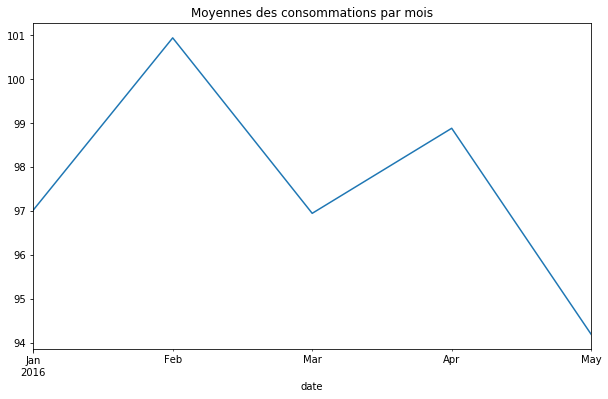

In [26]:
df_month = df_simple.resample('M').mean()
plt.figure(figsize=(10,6))
df_month.Appliances.plot()
plt.title('Moyennes des consommations par mois')
plt.show()

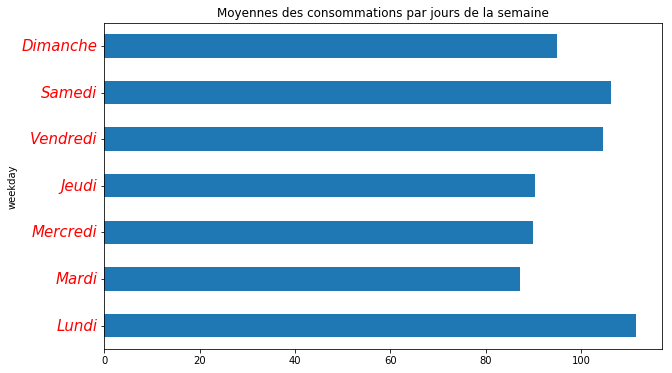

In [27]:
df_simple['weekday'] = df.index.weekday
days_list=['Lundi','Mardi','Mercredi','Jeudi','Vendredi','Samedi','Dimanche']
df_simple_day = df_simple.groupby('weekday').mean()

plt.figure(figsize=(10,6))
df_simple_day.Appliances.plot(kind='barh')
plt.title('Moyennes des consommations par jours de la semaine').axes.yaxis.set_ticklabels(days_list, color = 'red', fontsize = 15, style = 'italic', verticalalignment = 'center')
plt.show()

In [28]:
df_simple_day.corr()

,Appliances,lights,T6,RH_6,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,T_avg_in,RH_avg_in
Appliances,1.000000,-0.051634,0.917782,-0.483591,0.871888,-0.361496,-0.403613,0.529158,-0.408744,0.539879,0.080326,0.214853
lights,-0.051634,1.000000,-0.303617,-0.440787,-0.241370,0.351197,-0.424588,0.071619,0.428236,-0.426144,0.731610,0.293401
T6,0.917782,-0.303617,1.000000,-0.263653,0.972699,-0.401078,-0.192367,0.498867,-0.493578,0.718440,0.012612,0.241726
RH_6,-0.483591,-0.440787,-0.263653,1.000000,-0.156286,0.220708,0.980462,-0.038542,0.305494,0.436418,0.023612,0.295164
T_out,0.871888,-0.241370,0.972699,-0.156286,1.000000,-0.446517,-0.092530,0.648447,-0.499296,0.805586,0.128804,0.439981
Press_mm_hg,-0.361496,0.351197,-0.401078,0.220708,-0.446517,1.000000,0.276821,-0.690251,0.963393,-0.235609,0.508805,-0.133761
RH_out,-0.403613,-0.424588,-0.192367,0.980462,-0.092530,0.276821,1.000000,-0.054895,0.367520,0.506283,0.110585,0.360886
Windspeed,0.529158,0.071619,0.498867,-0.038542,0.648447,-0.690251,-0.054895,1.000000,-0.566091,0.573563,0.167567,0.708715
Visibility,-0.408744,0.428236,-0.493578,0.305494,-0.499296,0.963393,0.367520,-0.566091,1.000000,-0.205385,0.584496,0.034178
Tdewpoint,0.539879,-0.426144,0.718440,0.436418,0.805586,-0.235609,0.506283,0.573563,-0.205385,1.000000,0.192050,0.627980


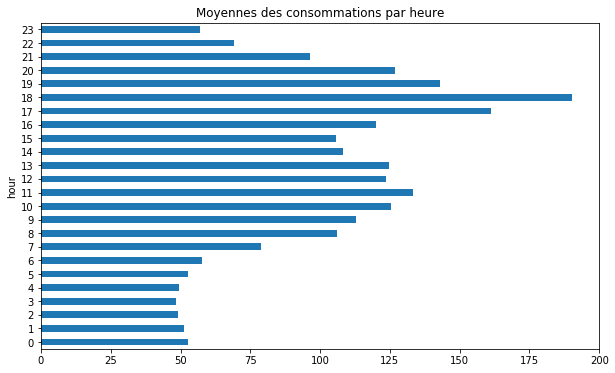

In [31]:
df_simple['hour'] = df.index.hour
df_simple_hour = df_simple.groupby('hour').mean()
plt.figure(figsize=(10,6))
df_simple_hour.Appliances.plot(kind='barh')
plt.title('Moyennes des consommations par heure')
plt.show()

In [32]:
df_simple_hour.corr()

,Appliances,lights,T6,RH_6,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,T_avg_in,RH_avg_in,weekday
Appliances,1.000000,0.577202,0.785139,-0.788725,0.782269,-0.361485,-0.766014,0.731801,-0.309917,0.511647,0.423590,-0.759006,-0.336682
lights,0.577202,1.000000,0.237918,-0.370340,0.354103,-0.013400,-0.324117,0.122733,-0.094769,0.591538,0.593637,-0.226073,-0.833795
T6,0.785139,0.237918,1.000000,-0.962858,0.972286,-0.269327,-0.966678,0.990806,-0.533435,0.481632,0.518287,-0.947407,-0.020989
RH_6,-0.788725,-0.370340,-0.962858,1.000000,-0.998858,0.355024,0.997767,-0.939341,0.499576,-0.463585,-0.715979,0.953338,0.237288
T_out,0.782269,0.354103,0.972286,-0.998858,1.000000,-0.330529,-0.997749,0.950324,-0.509613,0.475947,0.697055,-0.955126,-0.206045
Press_mm_hg,-0.361485,-0.013400,-0.269327,0.355024,-0.330529,1.000000,0.378081,-0.271753,-0.018996,0.545878,-0.233997,0.485145,0.198348
RH_out,-0.766014,-0.324117,-0.966678,0.997767,-0.997749,0.378081,1.000000,-0.948883,0.518741,-0.418122,-0.696055,0.960590,0.197066
Windspeed,0.731801,0.122733,0.990806,-0.939341,0.950324,-0.271753,-0.948883,1.000000,-0.555444,0.417998,0.461046,-0.938677,0.067787
Visibility,-0.309917,-0.094769,-0.533435,0.499576,-0.509613,-0.018996,0.518741,-0.555444,1.000000,-0.215285,-0.222580,0.397551,-0.048303
Tdewpoint,0.511647,0.591538,0.481632,-0.463585,0.475947,0.545878,-0.418122,0.417998,-0.215285,1.000000,0.398651,-0.302242,-0.279058


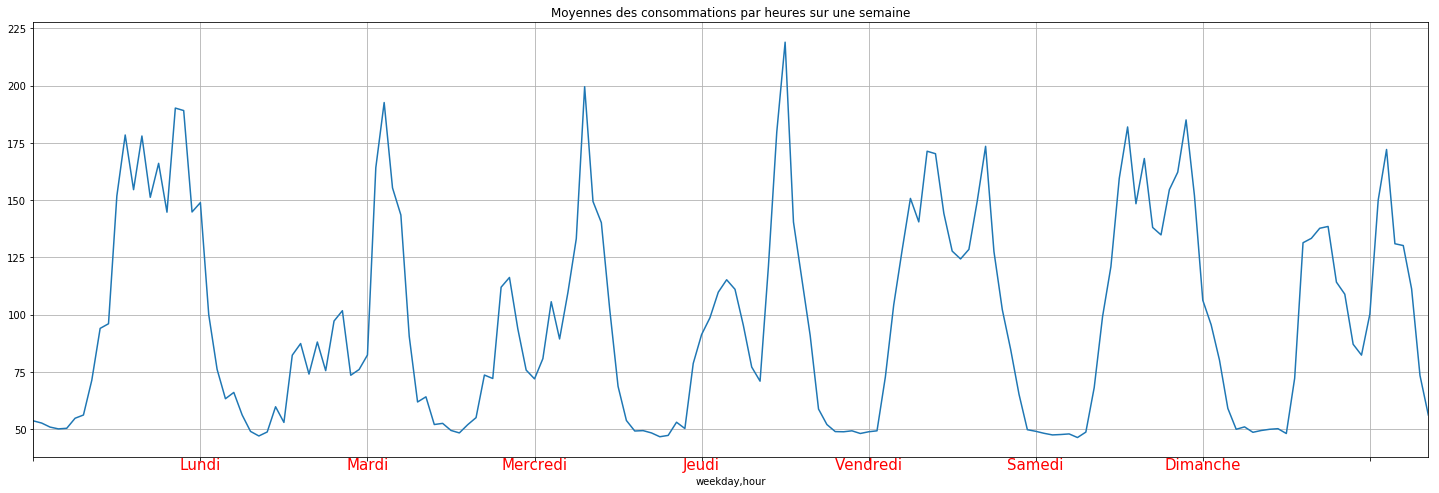

In [33]:
#Affinons ce resultat
plt.figure(figsize=(25,8))
df_simple.groupby(['weekday','hour'])['Appliances'].mean().plot(grid=True)
days_list=['','Lundi','Mardi','Mercredi','Jeudi','Vendredi','Samedi','Dimanche']
plt.title('Moyennes des consommations par heures sur une semaine').axes.xaxis.set_ticklabels(days_list, color = 'red', fontsize = 15, verticalalignment = 'center')
plt.show()

On remarque chaque jour un pic de consommation et des heures ou elle est relativement basse.

In [34]:
df_simple.groupby(['weekday','hour']).mean().corr()

,Appliances,lights,T6,RH_6,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,T_avg_in,RH_avg_in
Appliances,1.000000,0.417637,0.718886,-0.703888,0.703243,-0.152933,-0.678072,0.542983,-0.080623,0.242690,0.361826,-0.536938
lights,0.417637,1.000000,0.142685,-0.284650,0.224941,0.123514,-0.247508,0.042446,0.032404,0.040482,0.539437,-0.092777
T6,0.718886,0.142685,1.000000,-0.939399,0.968643,-0.131837,-0.942059,0.761194,-0.177920,0.305555,0.458094,-0.821810
RH_6,-0.703888,-0.284650,-0.939399,1.000000,-0.959588,0.142406,0.985591,-0.689936,0.118579,-0.129066,-0.635749,0.843259
T_out,0.703243,0.224941,0.968643,-0.959588,1.000000,-0.133700,-0.965039,0.753645,-0.182091,0.341680,0.622317,-0.809494
Press_mm_hg,-0.152933,0.123514,-0.131837,0.142406,-0.133700,1.000000,0.127753,-0.352438,0.290471,-0.025979,0.167175,0.134602
RH_out,-0.678072,-0.247508,-0.942059,0.985591,-0.965039,0.127753,1.000000,-0.705486,0.163578,-0.090055,-0.610107,0.869910
Windspeed,0.542983,0.042446,0.761194,-0.689936,0.753645,-0.352438,-0.705486,1.000000,-0.154833,0.350146,0.342222,-0.480829
Visibility,-0.080623,0.032404,-0.177920,0.118579,-0.182091,0.290471,0.163578,-0.154833,1.000000,-0.132547,0.094067,0.144786
Tdewpoint,0.242690,0.040482,0.305555,-0.129066,0.341680,-0.025979,-0.090055,0.350146,-0.132547,1.000000,0.201158,0.061926


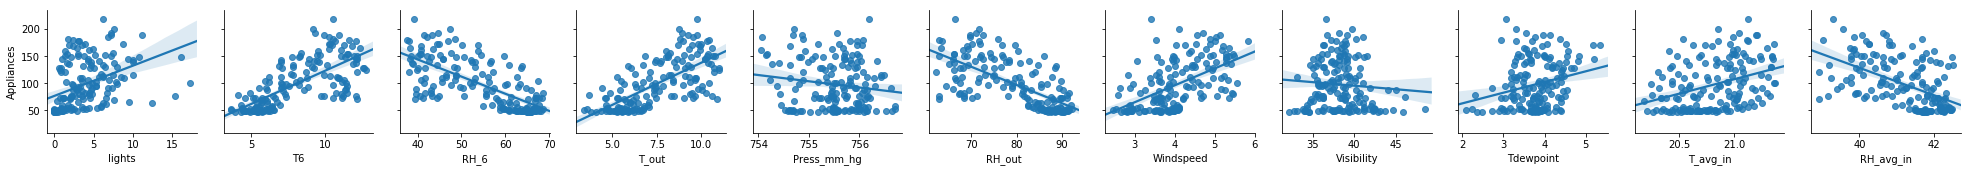

In [37]:
sns.pairplot(df_simple.groupby(['weekday','hour']).mean(), y_vars='Appliances',x_vars=df_simple.columns[1:-2],kind="reg")
#plt.suptitle('Corrélations des variables en fonction d\'Appliances')
plt.show()

In [39]:
# Centrer reduire toutes les valeurs
scaler = StandardScaler()
scaled = scaler.fit_transform(df)
scaled
df_scaled = df.copy()
df_scaled.iloc[:,:] = scaled

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Apprentissage avec un Algorithme de Machine Learning

## Test du modele

In [40]:
# Modele de machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df[['Appliances']], test_size=0.33, random_state=42)
lm = LinearRegression(normalize =True)
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [41]:
Y_hat = lm.predict(X_test)

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


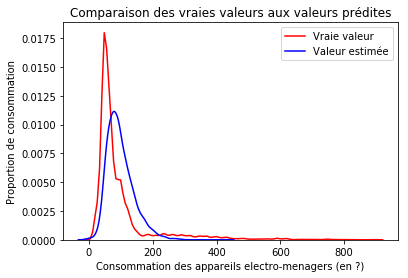

In [42]:
plt.figure()

ax1 = sns.distplot(y_test, hist=False, color="r", label="Vraie valeur")
sns.distplot(Y_hat, hist=False, color="b", label="Valeur estimée" , ax=ax1)

plt.title('Comparaison des vraies valeurs aux valeurs prédites')
plt.xlabel('Consommation des appareils electro-menagers (en ?)')
plt.ylabel('Proportion de consommation')

plt.show()
plt.close()

In [43]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print('score: ',lm.score(X_train,y_train))
mse=mean_squared_error(y_test, Y_hat, sample_weight=None)
print('MSE: ', mse)
print('RMSE: ',sqrt(mse)
)

score:  0.16439901488481468
MSE:  8757.179508055882
RMSE:  93.57980288532286


In [56]:
def linearR(d):
    X_train, X_test, y_train, y_test = train_test_split(d.iloc[:,1:], d['Appliances'], test_size=0.33, random_state=42)
    # Second découpage pour retirer quelques valeurs a predire:
#     X_train, X_cut, y_train, y_cut = train_test_split(X_train,  y_train, test_size=0.01, random_state=42)
    #Z= d.iloc[:,1:]
    l = LinearRegression()
    l.fit(X_train,y_train)
    Y_hat = l.predict(X_test)
    print('score: ', l.score(X_train,y_train))
    mse=mean_squared_error(y_test, Y_hat, sample_weight=None)
    print('MSE: ', mse)
    print('RMSE: ',sqrt(mse))
    tab = dict(zip(d.columns[1:],l.coef_))
    dt = pd.DataFrame({'column':list([x for x in tab]),'coef_':[v for v in tab.values()]})
    dt.set_index('column', inplace=True)
    #print(dt.sort_values(by='coef_'))
    plt.figure()
    #[print(x) for x in tab]
    #[print(x) for x in tab.values()]

    ax1 = sns.distplot(y_test, hist=False, color="r", label="Vraie valeur")
    sns.distplot(Y_hat, hist=False, color="b", label="Valeur estimée" , ax=ax1)
    plt.title('Comparaison des vraies valeurs aux valeurs prédites')
    plt.xlabel('Consommation des appareils electro-menagers (en Wh)')
    plt.ylabel('Proportion de consommation')

    plt.show()
    plt.close()
    
#     y = l.predict(X_cut)
#     print(y)


## Test du modele avec données centrées et réduites

score:  0.16867703590056093
MSE:  0.8305244900904225
RMSE:  0.9113311637875786


C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


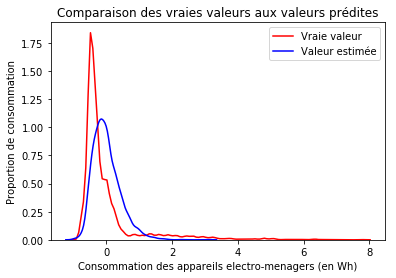

In [57]:
linearR(df_scaled)

## Test du modele avec les données regroupées par jour et heure

In [59]:
df_scaled['weekday'] = df.index.weekday
df_scaled['hour'] = df.index.hour

score:  0.8854586698570097
MSE:  0.04706325750995637
RMSE:  0.21694067739812276


C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


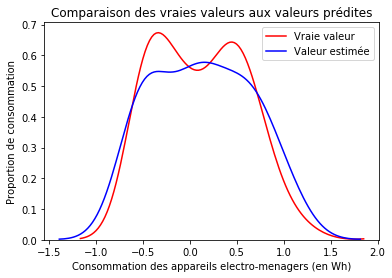

In [60]:
linearR(df_scaled.groupby(['weekday','hour']).mean())

score:  1.0
MSE:  0.012481402185505908
RMSE:  0.11172019596073894


C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


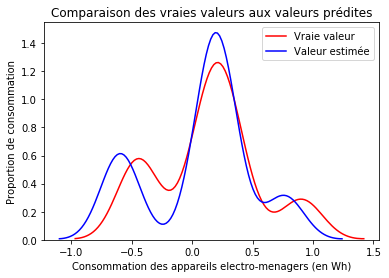

In [61]:
linearR(df_scaled.groupby('hour').mean())

## A venir : Prediction avec un modele de deep Learning specialisé dans le traitement de données temporelles

In [53]:
# Pre processing pour NN LSTM 
#Suppression de la colonne weekday et ajout de la colonne day
# df_scaled.drop('weekday', axis=1, inplace=True)
# df_scaled['day'] = df_scaled.index.dayofyear
# df_scaled.head()
# #LSTM